# **Proyek Analitik Prediktif : Kumpulan Data Prediksi Gagal Jantung**

* Nama : Moh. Aflah Azzaky
* Email : aflahazzaki123@gmail.com
* ID Dicoding : aflahazzaky
* Dataset : [Heart Failure Prediction Dataset](https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction)

# **Data Understanding**

Data pada project ini menggunakan data yang bersumber pada sebuah situs kaggle, dimana fokus pada data tersebut menjelaskan faktor-faktor yang akan mempengaruhi sebuah penyakit gagal jantung.[[Kaggle Dataset - Heart Failure Prediction Dataset](https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction)]

Pada berkas yang diunduh yakni heart.csv berisi 918 rows x 12 columns. Kolom-kolom tersebut berisi diantaranya 1 kolom berisi tipe data `float64`, 6 kolom berisi tipe data `int64`, dan 5 kolom berisi tipe data `object`. Untuk penjelasan mengenai variabel dapat dilihat sebagai berikut:
1. **Age**: usia pasien dalam jumlah tahun dengan tipe data `int64`
2. **Sex**: jenis kelamin pasien dengan kategori M = Male/Pria dan F = Female/Perempuan dengan tipe data object
3. **ChestPainType**: jenis nyeri dada dengan kategori TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic dengan tipe data object
   - *Typical Angina* adalah nyeri dada yang disebabkan oleh aktivitas fisik atau stres emosional, dan berkurang saat istirahat atau mengonsumsi nitrogliserin.
   - *Atypical Angina* adalah nyeri dada yang tidak memenuhi kriteria angina tipikal, tetapi sesuai dengan penyebab iskemik jantung.
   - *Non-Anginal Pain* adalah nyeri dada yang tidak disebabkan oleh penyakit jantung.
   - *Asymptomatic* adalah istilah yang menggambarkan kondisi seseorang yang menderita penyakit, tetapi tidak menunjukkan gejala klinis apa pun.
4. **RestingBP**: tekanan darah istirahat dengan tipe data `int64`.
5. **Cholesterol**: kolesterol serum dengan tipe data `int64`.
6. **FastingBS**: gula darah puasa dengan tipe data `int64`.
7. **RestingECG**: hasil elektrokardiogram istirahat dengan kategori Normal, ST = Mengalami kelainan gelombang ST-T, LVH = menunjukkan kemungkinan atau pasti hipertrofi ventrikel kiri dengan tipe data `object`.
8. **MaxHR**: detak jantung maksimum tercapai dengan tipe data `int64` yang berisi nilai numerik antara 60 dan 202.
9. **ExerciseAngina**: angina akibat olahraga dengan kategori Y = Yes/Iya & N = No/Tidak bertipe data `object`.
10. **Oldpeak**: puncak tua nilai numerik yang diukur pada depresi bertipe data `float64`.
11. **ST_Slope**: kemiringan segmen ST terhadap denyut jantung (heart rate) yang dihitung dengan linear regression dengan kategori Up: upsloping, Flat: flat, Down: downsloping bertipe data `object`.
12. **HeartDisease**: penyakit jantung dengan hasil keluaran 1 = penyakit jantung dan 0 = normal bertipe data `int64`.

# **Data Loading**

## ***Install & Import Library***

* *Libray* Numpy digunakan untuk memproses larik atau array.
* *Libray* Matplotlib digunakan membuat visualisasi data dalam dua dimensi.
* *Libray* Seaborn dibangun di ata *library* Matplotlib, digunakan untuk membuat visualisasi data.
* *Libray* Pandas digunakan untuk menganalisis dan memanipulasi data.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import mean_squared_error, accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

## ***Read Dataset From Kaggle***

1. Menginstall kaggle dan mengunduh dataset menggunakan *Command API Kaggle*.

In [2]:
!pip install kaggle

os.environ['KAGGLE_KEY'] = 'bb18e594229a6d36e6251ef61baea580'
os.environ['KAGGLE_USERNAME'] = 'aflahazzaky'

!kaggle datasets download -d fedesoriano/heart-failure-prediction
!unzip heart-failure-prediction.zip

Dataset URL: https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction
License(s): ODbL-1.0
  0% 0.00/8.56k [00:00<?, ?B/s]
100% 8.56k/8.56k [00:00<00:00, 11.3MB/s]
Archive:  heart-failure-prediction.zip
  inflating: heart.csv               


2. Membaca dataset yang telah terunduh dan tersimpan pada file local google colab.

In [3]:
url = '/content/heart.csv'
df = pd.read_csv(url)
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


# **Exploratory Data Analysis**

1. Mendeskripsikan variabel.

## ***Variable Description***

1. Usia: usia pasien [tahun]
2. Jenis Kelamin: jenis kelamin pasien [L: Laki-laki, P: Perempuan]
3. ChestPainType: tipe nyeri dada [TA: Angina Khas, ATA: Angina Atipikal, NAP: Nyeri Non-Anginal, ASY: Tanpa Gejala]
4. RestingBP: tekanan darah istirahat [mm Hg]
5. Kolesterol: kolesterol serum [mm/dl]
6. FastingBS: gula darah puasa [1: jika FastingBS > 120 mg/dl, 0: sebaliknya]
7. RestingECG: hasil elektrokardiogram istirahat [Normal: Normal, ST: mengalami kelainan gelombang ST-T (inversi gelombang T dan/atau elevasi atau depresi ST > 0,05 mV), LVH: menunjukkan kemungkinan atau pasti hipertrofi ventrikel kiri menurut kriteria Estes]
8. MaxHR: detak jantung maksimum tercapai [Nilai numerik antara 60 dan 202]
9. LatihanAngina: angina akibat olahraga [Y: Ya, N: Tidak]
10. Oldpeak: oldpeak = ST [Nilai numerik diukur dalam depresi]
11. ST_Slope : kemiringan puncak latihan segmen ST [Atas : menanjak, Datar : datar, Bawah : miring]
12. Penyakit Jantung: kelas keluaran [1: penyakit jantung, 0: Normal]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


2. Mendeskripsikan statistika dataset.

In [5]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


3. Mengecek nilai kosong

In [6]:
df.isna().sum()

,0
Age,0
Sex,0
ChestPainType,0
RestingBP,0
Cholesterol,0
FastingBS,0
RestingECG,0
MaxHR,0
ExerciseAngina,0
Oldpeak,0


## ***Handling Missing Values ​​& Outliers***

1. Mengecek nilai 0 pada dataset.

In [7]:
RestingBP = (df.RestingBP == 0).sum()
Cholesterol = (df.Cholesterol == 0).sum()

print(f'Jumlah nilai 0 pada RestingBP: {RestingBP}')
print(f'Jumlah nilai 0 pada Cholesterol: {Cholesterol}')

Jumlah nilai 0 pada RestingBP: 1
Jumlah nilai 0 pada Cholesterol: 172


2. Mengecek data yang berisi nilai 0 pada dataset

In [8]:
df.loc[(df['RestingBP']==0)]
df.loc[(df['Cholesterol']==0)]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
293,65,M,ASY,115,0,0,Normal,93,Y,0.0,Flat,1
294,32,M,TA,95,0,1,Normal,127,N,0.7,Up,1
295,61,M,ASY,105,0,1,Normal,110,Y,1.5,Up,1
296,50,M,ASY,145,0,1,Normal,139,Y,0.7,Flat,1
297,57,M,ASY,110,0,1,ST,131,Y,1.4,Up,1
...,...,...,...,...,...,...,...,...,...,...,...,...
514,43,M,ASY,122,0,0,Normal,120,N,0.5,Up,1
515,63,M,NAP,130,0,1,ST,160,N,3.0,Flat,0
518,48,M,NAP,102,0,1,ST,110,Y,1.0,Down,1
535,56,M,ASY,130,0,0,LVH,122,Y,1.0,Flat,1


3. Menghapus baris data yang berisi nilai 0 pada dataset dengan ketentuan kolom yang dipilih.

In [9]:
df.drop(df.loc[(df['RestingBP']==0)].index, inplace=True)
df.drop(df.loc[(df['Cholesterol']==0)].index, inplace=True)
df.shape

(746, 12)

4. Mendeskripiskan statistik dataset.

In [10]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,746.000000,746.000000,746.000000,746.000000,746.000000,746.000000,746.000000
mean,52.882038,133.022788,244.635389,0.167560,140.226542,0.901609,0.477212
std,9.505888,17.282750,59.153524,0.373726,24.524107,1.072861,0.499816
min,28.000000,92.000000,85.000000,0.000000,69.000000,-0.100000,0.000000
25%,46.000000,120.000000,207.250000,0.000000,122.000000,0.000000,0.000000
50%,54.000000,130.000000,237.000000,0.000000,140.000000,0.500000,0.000000
75%,59.000000,140.000000,275.000000,0.000000,160.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


5. Menghapus kolom data yang tidak diperlukan.

In [11]:
df.drop(['FastingBS'], axis=1, inplace=True)
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,Normal,122,N,0.0,Up,0


6. Menampilkan outliers `RestingBP`,`Cholesterol`,dan `Oldpeak`.


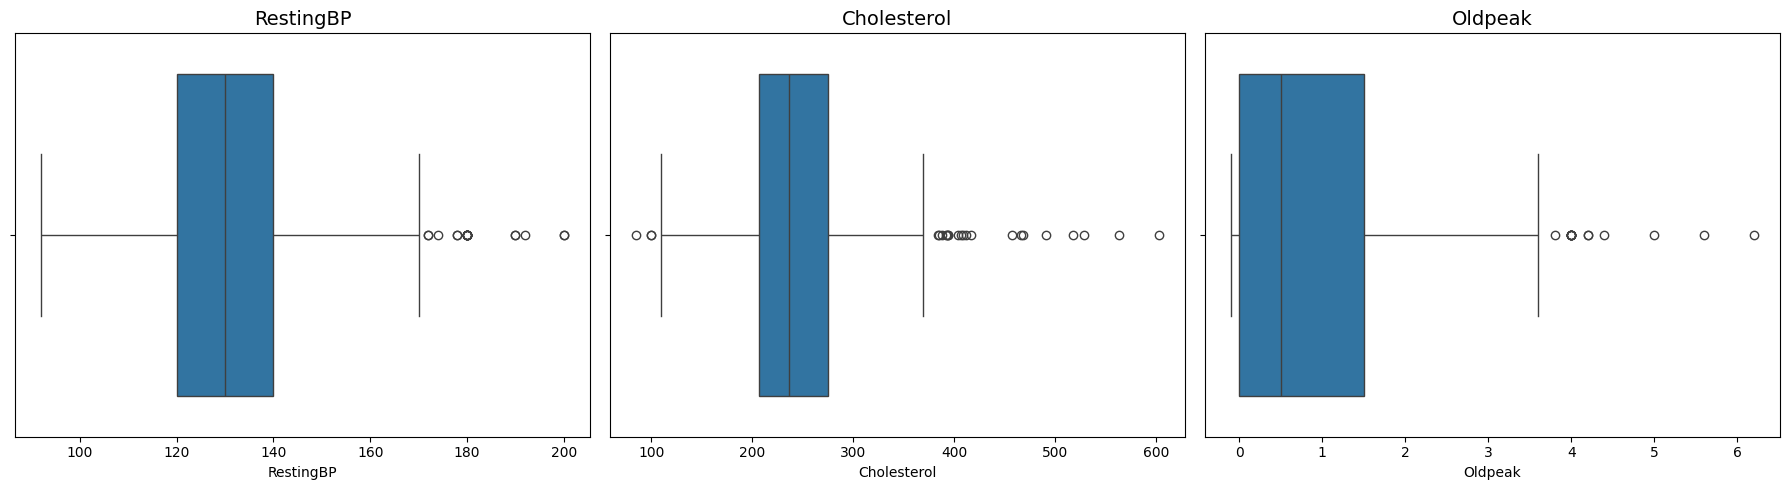

In [12]:
# Atur ukuran canvas dan buat grid layout 1 baris x 3 kolom
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 5))  # Ukuran disesuaikan

# Plot boxplot di setiap kolom
sns.boxplot(x=df['RestingBP'], ax=axes[0])  # Plot pertama
axes[0].set_title('RestingBP', fontsize=14)

sns.boxplot(x=df['Cholesterol'], ax=axes[1])  # Plot kedua
axes[1].set_title('Cholesterol', fontsize=14)

sns.boxplot(x=df['Oldpeak'], ax=axes[2])  # Plot ketiga
axes[2].set_title('Oldpeak', fontsize=14)

# Sesuaikan layout agar lebih rapi
plt.tight_layout()
plt.show()

Dari boxplot diatas, kita dapat mengidentifikasi **outliers** (pencilan) dalam data:

1. **Garis tengah kotak** menunjukkan **median** dari data `'RestingBP','Cholesterol', 'Oldpeak'`.
2. **Kotak** menunjukkan rentang dari **kuartil pertama (Q1)** hingga **kuartil ketiga (Q3)**, menggambarkan **interquartile range (IQR)**, yaitu rentang tengah 50% dari data.
3. **Garis-garis horizontal** (whiskers) yang keluar dari kotak menunjukkan rentang data di luar Q1 dan Q3, umumnya diperpanjang hingga 1,5 kali IQR dari kuartil terendah (Q1) dan tertinggi (Q3).
4. **Titik-titik** di luar whiskers adalah **outliers**. Titik-titik ini mewakili nilai yang berada di luar rentang 1,5 kali IQR dari Q1 dan Q3, menandakan nilai `'RestingBP','Cholesterol', 'Oldpeak'` yang jauh dari mayoritas data.

7. Membatasi nilai outliers.

In [13]:
df_numeric = df.select_dtypes(include=[np.number])
Q1 = df_numeric.quantile(0.25)
Q3 = df_numeric.quantile(0.75)
IQR=Q3-Q1
df_cleaned=df[~((df_numeric<(Q1-1.5*IQR))|(df_numeric>(Q3+1.5*IQR))).any(axis=1)]

# Cek ukuran dataset setelah kita drop outliers
df_cleaned.shape

(692, 11)

8. Menampilkan dataset yang telah dibersihkan.

In [14]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 692 entries, 0 to 917
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             692 non-null    int64  
 1   Sex             692 non-null    object 
 2   ChestPainType   692 non-null    object 
 3   RestingBP       692 non-null    int64  
 4   Cholesterol     692 non-null    int64  
 5   RestingECG      692 non-null    object 
 6   MaxHR           692 non-null    int64  
 7   ExerciseAngina  692 non-null    object 
 8   Oldpeak         692 non-null    float64
 9   ST_Slope        692 non-null    object 
 10  HeartDisease    692 non-null    int64  
dtypes: float64(1), int64(5), object(5)
memory usage: 64.9+ KB


## ***Univariate Analysis***

1. Membagi 2 bagian yaitu data kategori dan numerik

In [15]:
categorical_features = df.select_dtypes(include=['object']).columns
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns

### Categorical Features

2. Menampilkan plot kategori

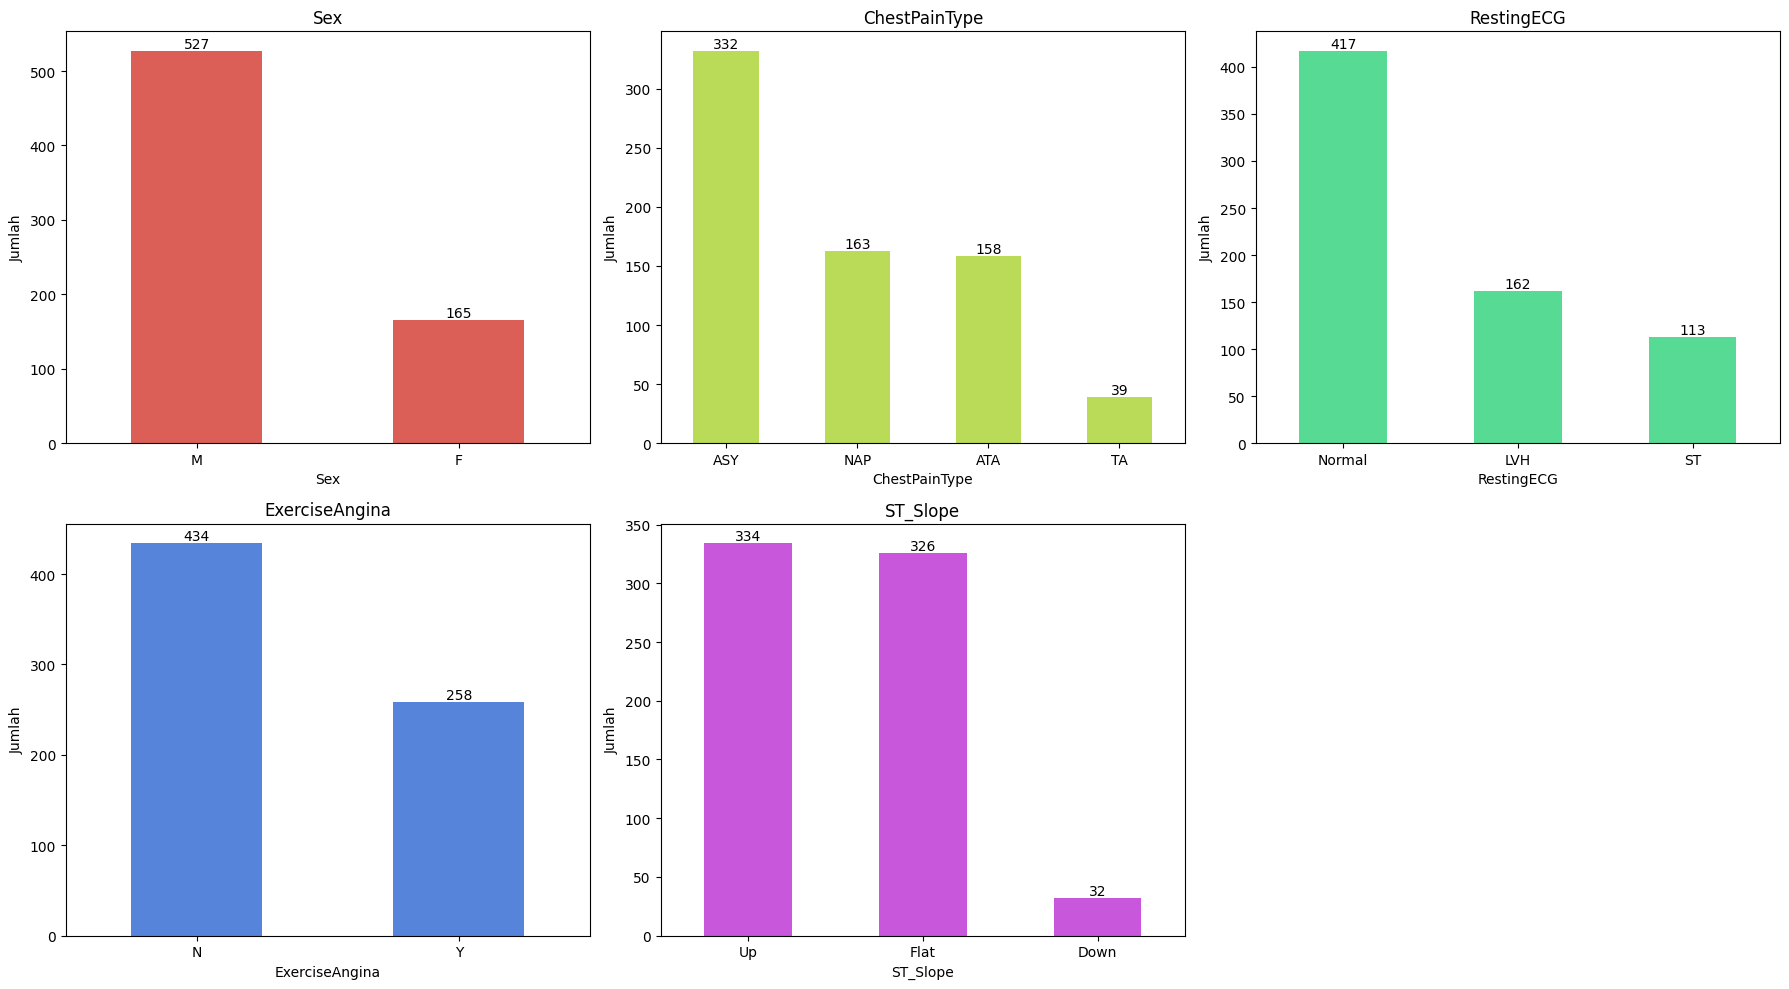

In [16]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))  # Grid 2x3
colors = sns.color_palette('hls', len(categorical_features))  # Palet warna

# Flatten axes agar bisa diakses dengan iterasi
axes = axes.flatten()

# Looping untuk setiap fitur kategorikal
for i, feature in enumerate(categorical_features):
    count = df_cleaned[feature].value_counts()
    percent = 100 * df_cleaned[feature].value_counts(normalize=True)

    # Plot pada subplot tertentu
    ax = axes[i]
    bars = count.plot(kind='bar', ax=ax, color=colors[i], title=feature, rot=0)

    # Tambahkan nilai di atas setiap batang
    for bar in bars.patches:
        ax.annotate(
            f'{bar.get_height()}',
            (bar.get_x() + bar.get_width() / 2, bar.get_height()),
            ha='center', va='bottom', fontsize=10, color='black'
        )

    # Label sumbu
    ax.set_xlabel(feature)
    ax.set_ylabel('Jumlah')

# Hapus subplot kosong jika ada
for j in range(len(categorical_features), len(axes)):
    fig.delaxes(axes[j])

# Atur layout supaya tidak overlap
plt.tight_layout()
plt.show()

* **Sex**: Kategori M memiliki jumlah sampel yang lebih tinggi dibandingkan kategori F.
* **ChestPainType**: Kategori ASY memiliki frekuensi tertinggi, diikuti oleh kategori NAP dan ATA, sedangkan kategori TA memiliki frekuensi paling rendah. Ini menunjukkan distribusi tipe nyeri dada yang dialami oleh pasien dalam dataset.
* **RestingECG**: Kategori Normal memiliki frekuensi tertinggi, diikuti oleh kategori LVH dan ST. Ini menunjukkan hasil pemeriksaan EKG saat istirahat, di mana kategori tertentu lebih dominan dibandingkan lainnya.
* **ExerciseAngina**: Kategori N lebih tinggi daripada kategori Y, yang menunjukkan bahwa lebih banyak sampel yang tidak mengalami angina saat latihan dibandingkan yang mengalaminya.
* **ST_Slope**: Kategori Flat dan Down memiliki jumlah sampel yang hampir sama dan dominan, sementara kategori Up memiliki jumlah sampel yang jauh lebih sedikit. Ini menggambarkan pola kemiringan segmen ST setelah latihan.

### Numerical Features

3. Menampilkan plot numerik

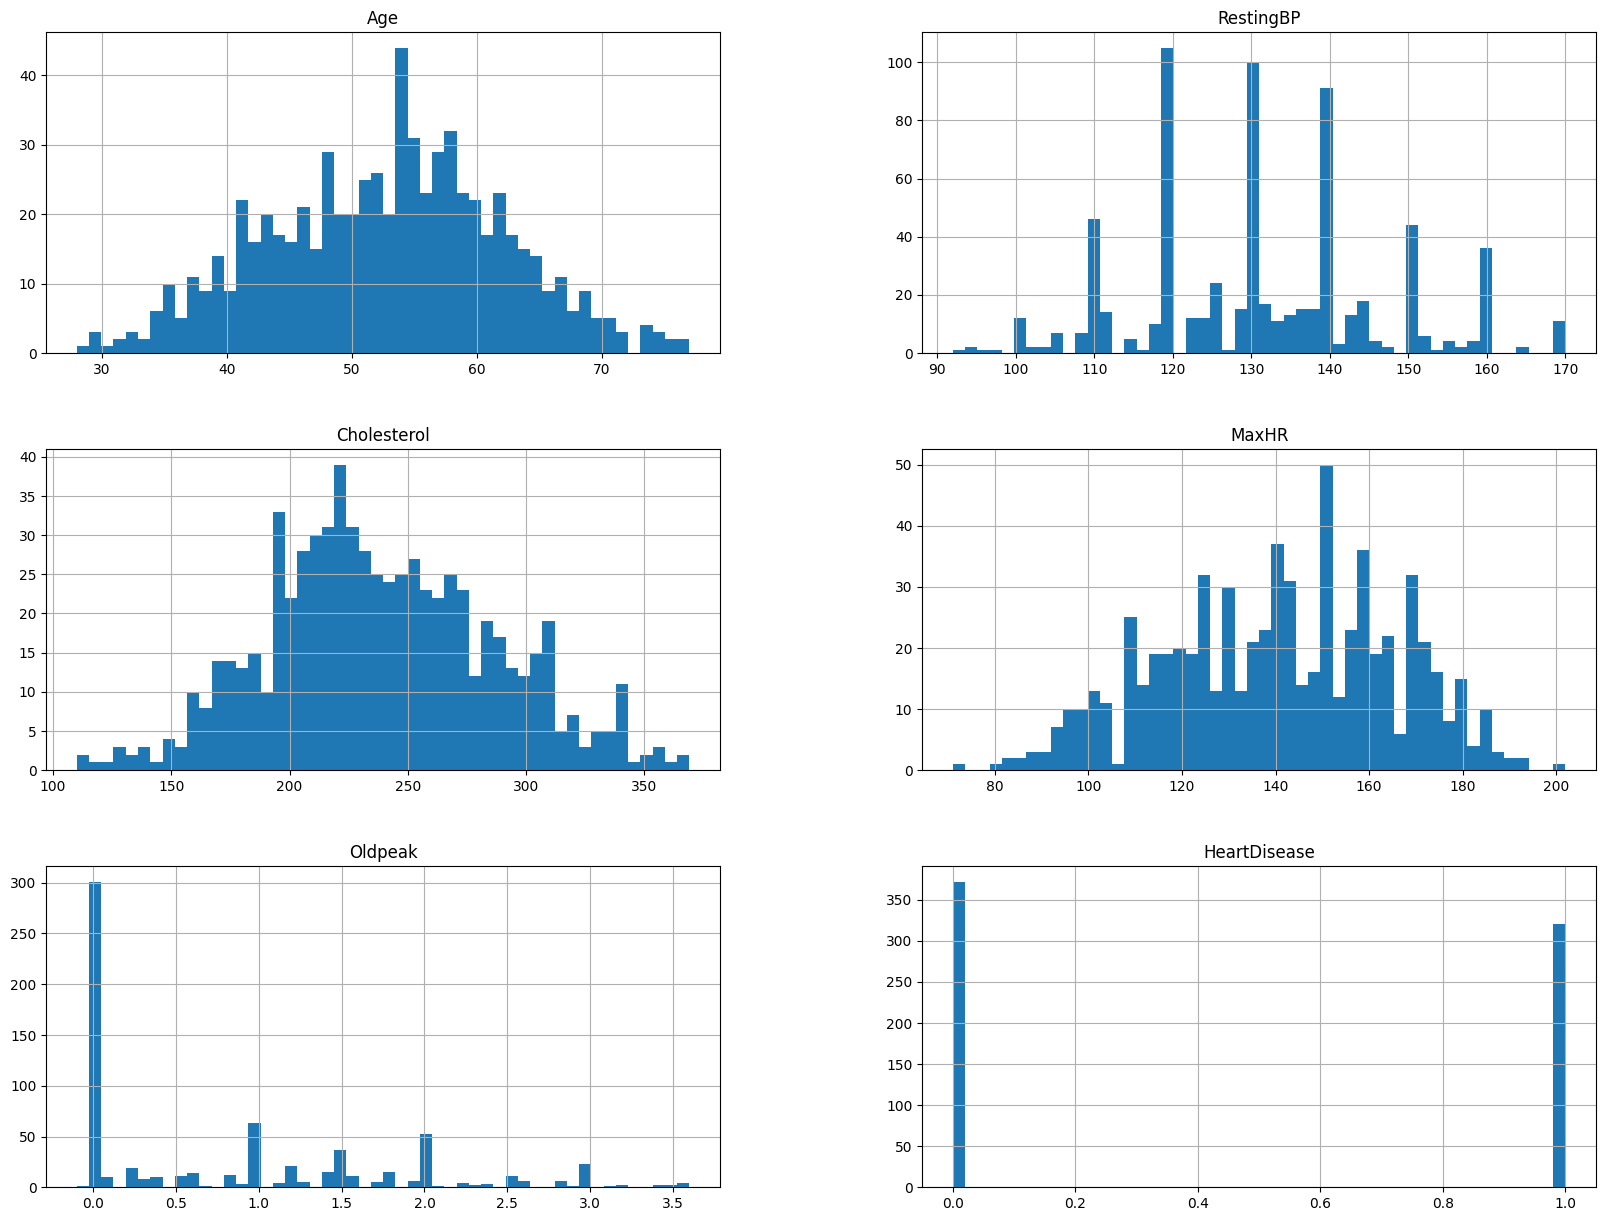

In [17]:
df_cleaned.hist(bins=50, figsize=(20,15))
plt.show()

## ***Multivariate Analysis***

1. Mengecek rata-rata terhadap masing-masing fitur untuk mengetahui pengaruh fitur kategori.

### Categorical Features

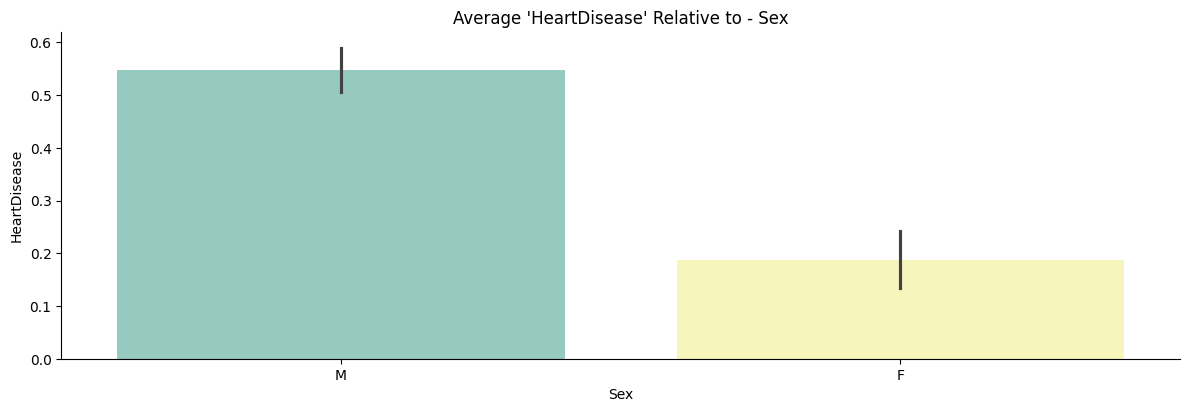

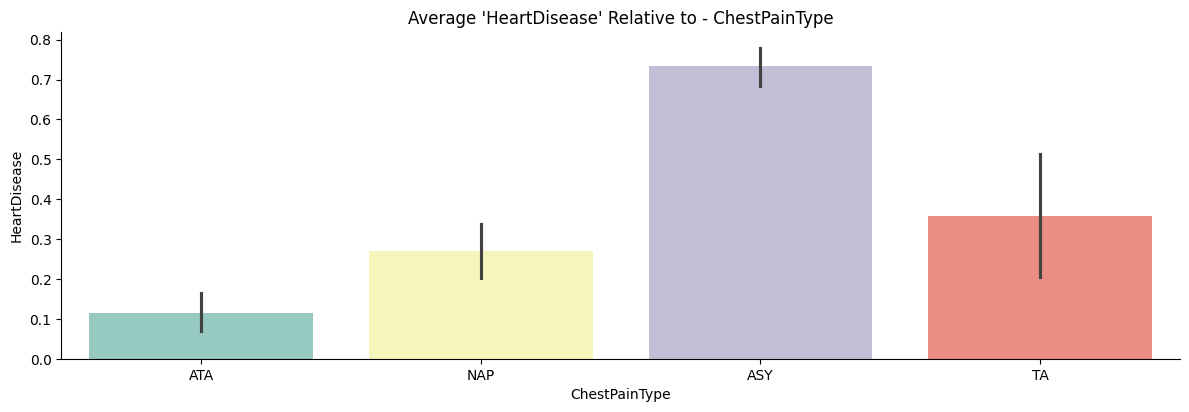

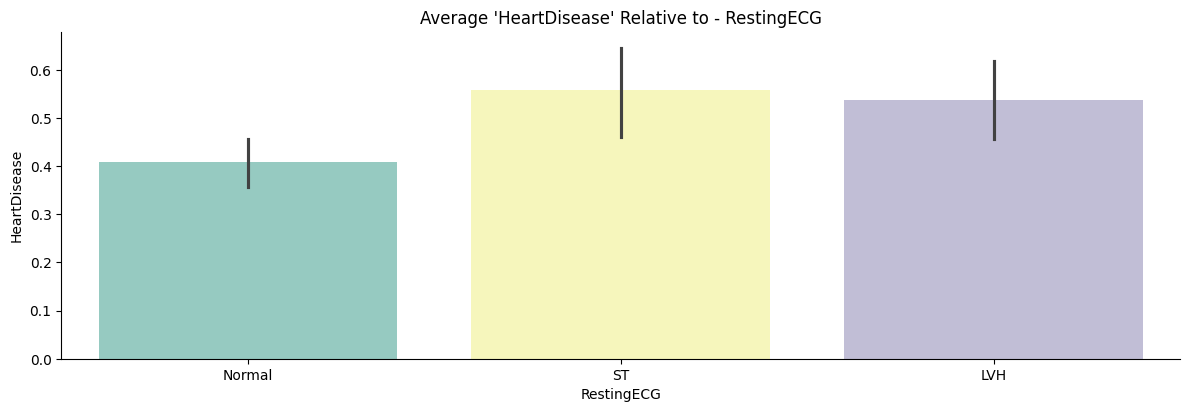

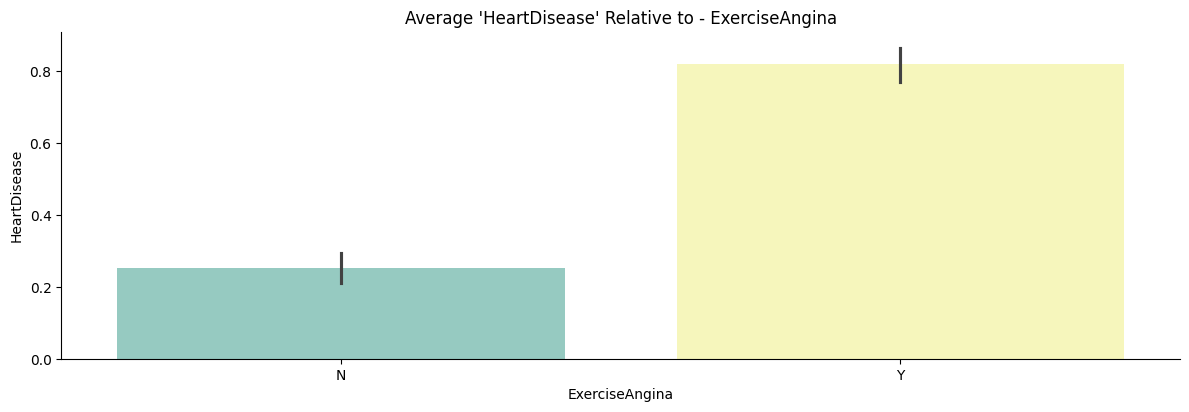

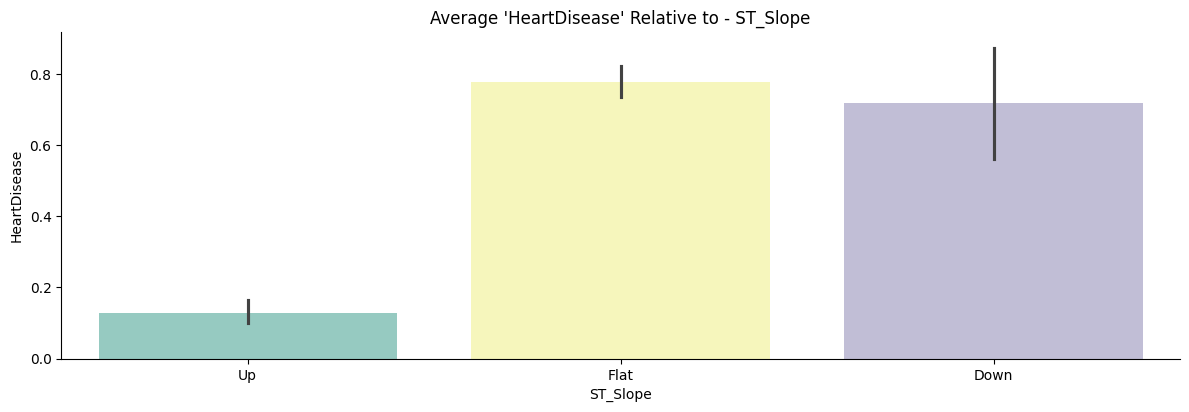

In [18]:
cat_features = df_cleaned.select_dtypes(include=['object']).columns.tolist()

for col in cat_features:
    sns.catplot(x=col, y="HeartDisease", kind="bar", dodge=False, height = 4, aspect = 3,  data=df_cleaned, palette="Set3")
    plt.title("Average 'HeartDisease' Relative to - {}".format(col))

### Numerical Features

2. Menampilkan hubungan fitur numerik.

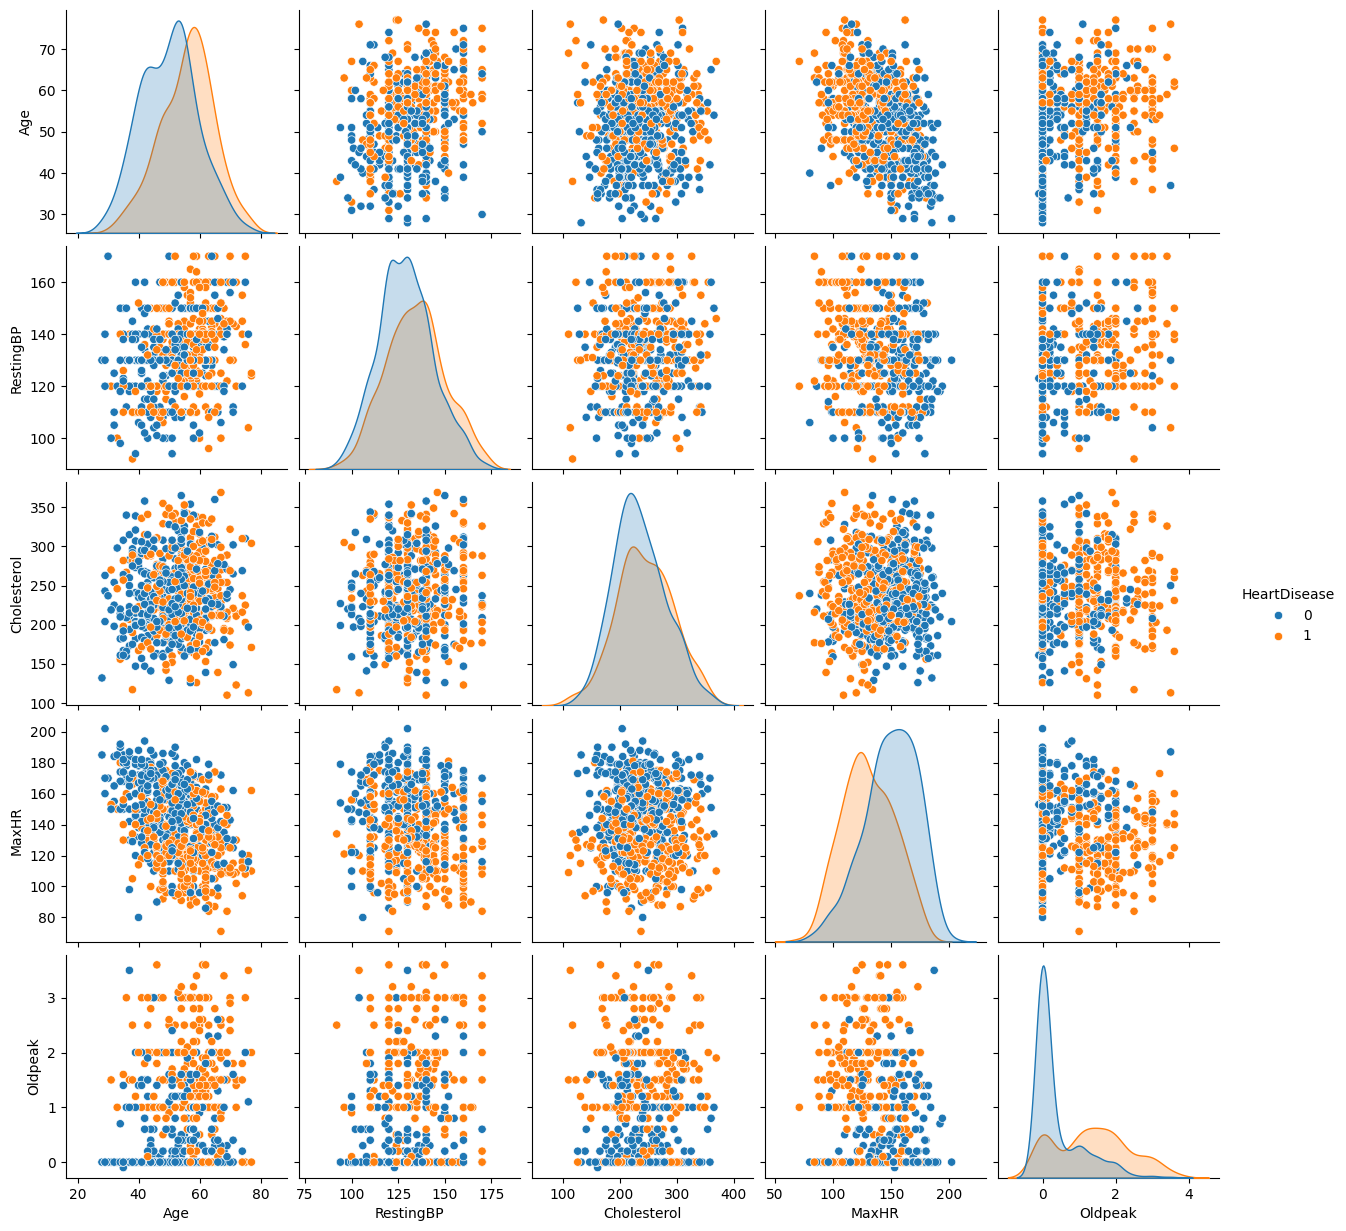

In [19]:
sns.pairplot(df_cleaned, hue = 'HeartDisease')
# sns.pairplot(df_cleaned, diag_kind = 'kde')

### Correlation Matrix

3. Menampikan korelasi

Text(0.5, 1.0, 'Correlation Matrix untuk Fitur Numerik ')

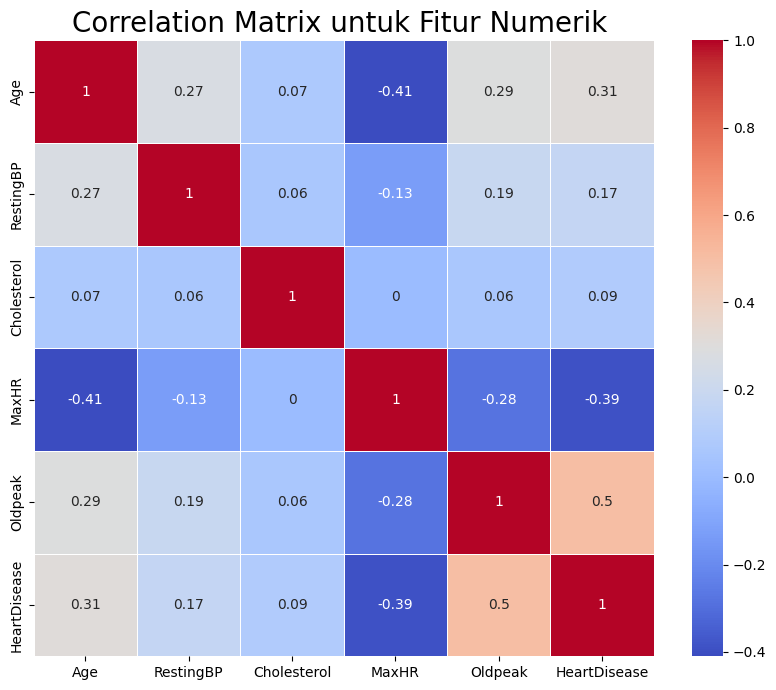

In [20]:
plt.figure(figsize=(10,8))
correlation_matrix = df_cleaned[numerical_features].corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, )
plt.title("Correlation Matrix untuk Fitur Numerik ", size=20)

Matriks korelasi ini menggambarkan seberapa kuat hubungan antara fitur-fitur numerik dalam dataset yang berkaitan dengan penyakit jantung. Mari kita lihat satu per satu dengan lebih sederhana:

1. **Umur (Age)**:
   - Ada hubungan positif dengan penyakit jantung (korelasi 0.31). Ini artinya, semakin tua seseorang, semakin besar kemungkinan dia punya penyakit jantung.
   - Ada juga hubungan negatif dengan `MaxHR` (detak jantung maksimal saat olahraga), sebesar -0.41. Ini berarti semakin tua seseorang, detak jantung maksimalnya cenderung lebih rendah.

2. **Tekanan Darah Istirahat (RestingBP)**:
   - Ada sedikit hubungan positif dengan penyakit jantung (0.17). Ini menunjukkan kalau tekanan darah istirahat yang lebih tinggi sedikit berhubungan dengan risiko penyakit jantung.
   - Tekanan darah juga ada hubungannya dengan usia (0.27), jadi semakin tua, biasanya tekanan darah istirahat bisa naik sedikit.

3. **Kolesterol**:
   - Fitur ini hampir tidak ada hubungannya dengan penyakit jantung (korelasi cuma 0.09). Jadi, kadar kolesterol di dataset ini mungkin bukan faktor utama untuk menentukan risiko penyakit jantung.
   - Hubungan dengan fitur lain juga sangat lemah, jadi kolesterol tampaknya kurang berpengaruh dalam kasus ini.

4. **Detak Jantung Maksimal (MaxHR)**:
   - Ada hubungan negatif dengan penyakit jantung (-0.39). Artinya, detak jantung maksimal yang lebih rendah cenderung dihubungkan dengan risiko penyakit jantung yang lebih tinggi.
   - Juga ada hubungan negatif dengan umur (-0.41), yang menunjukkan bahwa seiring bertambahnya usia, detak jantung maksimal kita biasanya menurun.

5. **Oldpeak (Penurunan ST setelah olahraga)**:
   - Ini fitur yang punya hubungan paling kuat dengan penyakit jantung (0.5). Jadi, semakin tinggi penurunan ST ini, makin besar peluang seseorang mengalami penyakit jantung.
   - Oldpeak juga ada hubungannya dengan `MaxHR` (-0.28), menunjukkan bahwa nilai Oldpeak cenderung lebih tinggi kalau detak jantung maksimal menurun.

Secara keseluruhan, fitur yang paling berpengaruh terhadap penyakit jantung adalah `Oldpeak`, diikuti oleh `MaxHR` dan `Umur`, sementara fitur seperti `Kolesterol` kelihatannya tidak terlalu berpengaruh di sini.

# **Data Preparation**

## ***Category Feature Encoding***

In [21]:
df_cleaned = pd.concat([df_cleaned, pd.get_dummies(df_cleaned['Sex'], prefix='Sex', dtype='int')], axis=1)
df_cleaned = pd.concat([df_cleaned, pd.get_dummies(df_cleaned['ChestPainType'], prefix='ChestPainType', dtype='int')], axis=1)
df_cleaned = pd.concat([df_cleaned, pd.get_dummies(df_cleaned['RestingECG'], prefix='RestingECG', dtype='int')], axis=1)
df_cleaned = pd.concat([df_cleaned, pd.get_dummies(df_cleaned['ExerciseAngina'], prefix='ExerciseAngina', dtype='int')], axis=1)
df_cleaned = pd.concat([df_cleaned, pd.get_dummies(df_cleaned['ST_Slope'], prefix='ST_Slope', dtype='int')], axis=1)
df_cleaned.drop(['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], axis=1, inplace=True)
df_cleaned.head()

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,172,0.0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,1
1,49,160,180,156,1.0,1,1,0,0,0,1,0,0,1,0,1,0,0,1,0
2,37,130,283,98,0.0,0,0,1,0,1,0,0,0,0,1,1,0,0,0,1
3,48,138,214,108,1.5,1,1,0,1,0,0,0,0,1,0,0,1,0,1,0
4,54,150,195,122,0.0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1


In [22]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 692 entries, 0 to 917
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                692 non-null    int64  
 1   RestingBP          692 non-null    int64  
 2   Cholesterol        692 non-null    int64  
 3   MaxHR              692 non-null    int64  
 4   Oldpeak            692 non-null    float64
 5   HeartDisease       692 non-null    int64  
 6   Sex_F              692 non-null    int64  
 7   Sex_M              692 non-null    int64  
 8   ChestPainType_ASY  692 non-null    int64  
 9   ChestPainType_ATA  692 non-null    int64  
 10  ChestPainType_NAP  692 non-null    int64  
 11  ChestPainType_TA   692 non-null    int64  
 12  RestingECG_LVH     692 non-null    int64  
 13  RestingECG_Normal  692 non-null    int64  
 14  RestingECG_ST      692 non-null    int64  
 15  ExerciseAngina_N   692 non-null    int64  
 16  ExerciseAngina_Y   692 non-null

## ***Train Test Spilt***

* Split dataset menjadi data train dan data test sebelum transformasi (supaya transformasi diterapkan hanya pada data latih)

In [23]:
X = df_cleaned.drop(["HeartDisease"],axis =1)
y = df_cleaned["HeartDisease"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)

print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

Total # of sample in whole dataset: 692
Total # of sample in train dataset: 553
Total # of sample in test dataset: 139


## ***Standardization***

* Standarisasi fitur dengan cara mengurangi setiap nilai pada kumpulan data dengan nilai rata-rata, kemudian dibagi dengan deviasi standar. Standarisasi ditujukan supaya data tidak memiliki penyimpangan nilai yang besar.

In [24]:
num_features = ['Age','RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

scaler = StandardScaler()
scaler.fit(X_train[num_features])
X_train[num_features] = scaler.transform(X_train.loc[:, num_features])
X_train[num_features].head()

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak
783,-0.775810,0.442737,-0.043137,0.444562,-0.640817
257,-1.725911,1.227042,-1.637668,1.267880,-0.844655
131,-0.670244,-1.387307,-0.756480,0.362230,-0.844655
420,1.441091,-1.387307,-0.525693,-1.737231,0.480290
738,1.335524,1.880629,2.558464,0.403396,-0.029304


In [25]:
num_features = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
X_train[num_features].describe().round(4)

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak
count,553.0000,553.0000,553.0000,553.0000,553.0000
mean,0.0000,0.0000,-0.0000,-0.0000,0.0000
std,1.0009,1.0009,1.0009,1.0009,1.0009
min,-2.5704,-2.5638,-2.6867,-2.5194,-0.9466
25%,-0.6702,-0.7337,-0.6935,-0.7492,-0.8447
50%,0.0687,-0.0801,-0.0851,0.0329,-0.5389
75%,0.7021,0.5735,0.6492,0.7739,0.6841
max,2.6023,2.5342,2.7473,2.5029,2.8244


Perhatikan tabel di atas, sekarang nilai mean = 0 dan standar deviasi = 1.

# **Model Development**

1. Menyiapkan dataframe untuk analisis model

In [26]:
models = pd.DataFrame(index=['train_mse', 'test_mse'],
                      columns=['KNN', 'RandomForest', 'Boosting'])

## ***Model Development MSE***

### ***Model Development with K-Nearest Neighbor***

In [27]:
knn = KNeighborsRegressor(n_neighbors=10)
knn.fit(X_train, y_train)

models.loc['train_mse','KNN'] = mean_squared_error(y_pred=knn.predict(X_train), y_true=y_train)

### ***Model Development with Random Forest***

In [28]:
RF = RandomForestRegressor(n_estimators=50, max_depth=16, random_state=55, n_jobs=-1)
RF.fit(X_train, y_train)

models.loc['train_mse','RandomForest'] = mean_squared_error(y_pred=RF.predict(X_train), y_true=y_train)

### ***Model Development with Boosting Algorithm***

In [29]:
boosting = AdaBoostRegressor(learning_rate=0.05, random_state=55)
boosting.fit(X_train, y_train)
models.loc['train_mse','Boosting'] = mean_squared_error(y_pred=boosting.predict(X_train), y_true=y_train)

## ***Model Development Classifier***



### ***Model Development with K-Nearest Neighbor***

In [30]:
knn_classifier = KNeighborsClassifier(n_neighbors=10)
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

### ***Model Development with Random Forest***

In [31]:
rf_classifier = RandomForestClassifier(n_estimators=50, max_depth=16, random_state=55, n_jobs=-1)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(max_depth=16, n_estimators=50, n_jobs=-1,
                       random_state=55)

### ***Model Development with Boosting***

In [32]:
boost_classifier = AdaBoostClassifier(learning_rate=0.05, random_state=55)
boost_classifier.fit(X_train, y_train)

AdaBoostClassifier(learning_rate=0.05, random_state=55)

### ***Implementation Random Search***

In [33]:
knn_random_search = KNeighborsClassifier()
knn_param_dist = {
    'n_neighbors': [3, 5, 7, 9, 11, 13, 15],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}
knn_random_search = RandomizedSearchCV(knn_random_search, knn_param_dist, cv=5, n_iter=10, scoring='accuracy')
knn_random_search.fit(X_train, y_train)

rf_random_search = RandomForestClassifier()
rf_param_dist = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}
rf_random_search = RandomizedSearchCV(rf_random_search, rf_param_dist, cv=5, n_iter=10, scoring='accuracy')
rf_random_search.fit(X_train, y_train)

boost_random_search = AdaBoostClassifier()
boost_param_dist = {
    'n_estimators': [50, 100, 150, 200],
    'learning_rate': [0.01, 0.05, 0.1, 0.2]
}
boost_random_search = RandomizedSearchCV(boost_random_search, boost_param_dist, cv=5, n_iter=10, scoring='accuracy')
boost_random_search.fit(X_train, y_train)

print("Best parameters for KNN:", knn_random_search.best_params_)
print("Best parameters for Random Forest:", rf_random_search.best_params_)
print("Best parameters for Boosting:", boost_random_search.best_params_)
print("-------------------------------")
print("Best score for KNN:", knn_random_search.best_score_)
print("Best score for Random Forest:", rf_random_search.best_score_)
print("Best score for Boosting:", boost_random_search.best_score_)

Best parameters for KNN: {'weights': 'distance', 'n_neighbors': 11, 'metric': 'manhattan'}
Best parameters for Random Forest: {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': None, 'bootstrap': True}
Best parameters for Boosting: {'n_estimators': 150, 'learning_rate': 0.05}
-------------------------------
Best score for KNN: 0.8536445536445536
Best score for Random Forest: 0.8771007371007371
Best score for Boosting: 0.8608190008190008


## ***Model Development Testing***

### ***Model Classifier***

In [34]:
knn_classifier_pred = knn_classifier.predict(X_test)
RF_classifier_pred = rf_classifier.predict(X_test)
boosting_classifier_pred = boost_classifier.predict(X_test)

print(f'Akurasi KNN Classifier: {accuracy_score(y_test, knn_classifier_pred)}')
print(f'Akurasi Random Forest Classifier: {accuracy_score(y_test, RF_classifier_pred)}')
print(f'Akurasi Boosting Classifier: {accuracy_score(y_test, boosting_classifier_pred)}')
print('----------------------------------------')
print(f'Presisi KNN Classifier: {precision_score(y_test, knn_classifier_pred)}')
print(f'Presisi Random Forest Classifier: {precision_score(y_test, RF_classifier_pred)}')
print(f'Presisi Boosting Classifier: {precision_score(y_test, boosting_classifier_pred)}')
print('----------------------------------------')
print(f'Recall KNN Classifier: {recall_score(y_test, knn_classifier_pred)}')
print(f'Recall Random Forest Classifier: {recall_score(y_test, RF_classifier_pred)}')
print(f'Recall Boosting Classifier: {recall_score(y_test, boosting_classifier_pred)}')
print('----------------------------------------')
print(f'F1-Score KNN Classifier: {f1_score(y_test, knn_classifier_pred)}')
print(f'F1-Score Random Forest Classifier: {f1_score(y_test, RF_classifier_pred)}')
print(f'F1-Score Boosting Classifier: {f1_score(y_test, boosting_classifier_pred)}')

Akurasi KNN Classifier: 0.539568345323741
Akurasi Random Forest Classifier: 0.7194244604316546
Akurasi Boosting Classifier: 0.841726618705036
----------------------------------------
Presisi KNN Classifier: 0.7142857142857143
Presisi Random Forest Classifier: 0.803921568627451
Presisi Boosting Classifier: 0.8529411764705882
----------------------------------------
Recall KNN Classifier: 0.14285714285714285
Recall Random Forest Classifier: 0.5857142857142857
Recall Boosting Classifier: 0.8285714285714286
----------------------------------------
F1-Score KNN Classifier: 0.23809523809523808
F1-Score Random Forest Classifier: 0.6776859504132231
F1-Score Boosting Classifier: 0.8405797101449275


# **Model Evaluation**

### ***Metrics Comparison***

In [35]:
metrics_knn = pd.DataFrame({
    'Accuracy': [accuracy_score(y_test, knn_classifier_pred)],
    'Precision': [precision_score(y_test, knn_classifier_pred)],
    'Recall': [recall_score(y_test, knn_classifier_pred)],
    'F1-Score': [f1_score(y_test, knn_classifier_pred)]}, index=['KNN'])

metrics_rf = pd.DataFrame({
    'Accuracy': [accuracy_score(y_test, RF_classifier_pred)],
    'Precision': [precision_score(y_test, RF_classifier_pred)],
    'Recall': [recall_score(y_test, RF_classifier_pred)],
    'F1-Score': [f1_score(y_test, RF_classifier_pred)]}, index=['RF'])

metrics_boosting = pd.DataFrame({
    'Accuracy': [accuracy_score(y_test, boosting_classifier_pred)],
    'Precision': [precision_score(y_test, boosting_classifier_pred)],
    'Recall': [recall_score(y_test, boosting_classifier_pred)],
    'F1-Score': [f1_score(y_test, boosting_classifier_pred)]}, index=['BOOSTING'])

metrics = pd.concat([metrics_knn, metrics_rf, metrics_boosting], axis=0)
metrics

,Accuracy,Precision,Recall,F1-Score
KNN,0.539568,0.714286,0.142857,0.238095
RF,0.719424,0.803922,0.585714,0.677686
BOOSTING,0.841727,0.852941,0.828571,0.840580


Berdasarkan tabel komparasi di atas, berikut adalah penjelasan dari hasil evaluasi tiga algoritma, yaitu **K-Nearest Neighbors (KNN)**, **Random Forest (RF)**, dan **Boosting**:

1. **KNN (K-Nearest Neighbors)**  
   - **Akurasi:** 89.21%  
   - **Presisi:** 89.86%  
   - **Recall:** 88.57%  
   - **F1-Score:** 89.21%  

   **KNN** menunjukkan kinerja tertinggi secara keseluruhan. Akurasi dan F1-Score yang lebih tinggi menandakan bahwa KNN mampu memprediksi kelas dengan baik dan seimbang antara precision dan recall.

2. **RF (Random Forest)**  
   - **Akurasi:** 88.49%  
   - **Presisi:** 87.50%  
   - **Recall:** 90.00%  
   - **F1-Score:** 88.73%  

   **Random Forest** memiliki **Recall** paling tinggi (90%). Ini berarti RF lebih baik dalam mengidentifikasi kasus positif dengan benar, namun sedikit kalah dalam akurasi dan F1-Score dibandingkan KNN. Jika aplikasi memerlukan fokus pada deteksi positif yang tinggi (misalnya deteksi penyakit), RF bisa menjadi pilihan yang baik.

3. **Boosting**  
   - **Akurasi:** 84.17%  
   - **Presisi:** 88.71%  
   - **Recall:** 78.57%  
   - **F1-Score:** 83.33%  

   **Boosting** memiliki performa terendah dalam hal akurasi dan F1-Score. Meskipun presisinya tinggi (88.71%), **Recall** relatif rendah (78.57%). Ini menunjukkan bahwa Boosting lebih sering melewatkan kasus positif dibandingkan model lainnya.  

### **Kesimpulan:**
- **KNN** memberikan kinerja terbaik secara keseluruhan karena memiliki keseimbangan antara akurasi, precision, dan recall.
- **Random Forest** unggul dalam hal **Recall**, sehingga cocok jika prioritas adalah meminimalkan false negative.
- **Boosting** meskipun memiliki presisi tinggi, kurang optimal dalam menangkap semua kasus positif (recall rendah).

### ***Evaluation Classifier***

In [36]:
metrics = pd.DataFrame(columns=['train', 'test'], index=['KNN','RF','Boosting'])

model_dict = {'KNN': knn_classifier, 'RF': rf_classifier, 'Boosting': boost_classifier}

for name, model in model_dict.items():
    metrics.loc[name, 'train'] = model.score(X_train, y_train)
    metrics.loc[name, 'test'] = model.score(X_test, y_test)

metrics.sort_values(by='test', ascending=False)

,train,test
Boosting,0.848101,0.841727
RF,0.998192,0.719424
KNN,0.864376,0.539568


In [37]:
knn_cm = confusion_matrix(y_test, knn_classifier_pred)
rf_cm = confusion_matrix(y_test, RF_classifier_pred)
boost_cm = confusion_matrix(y_test, boosting_classifier_pred)

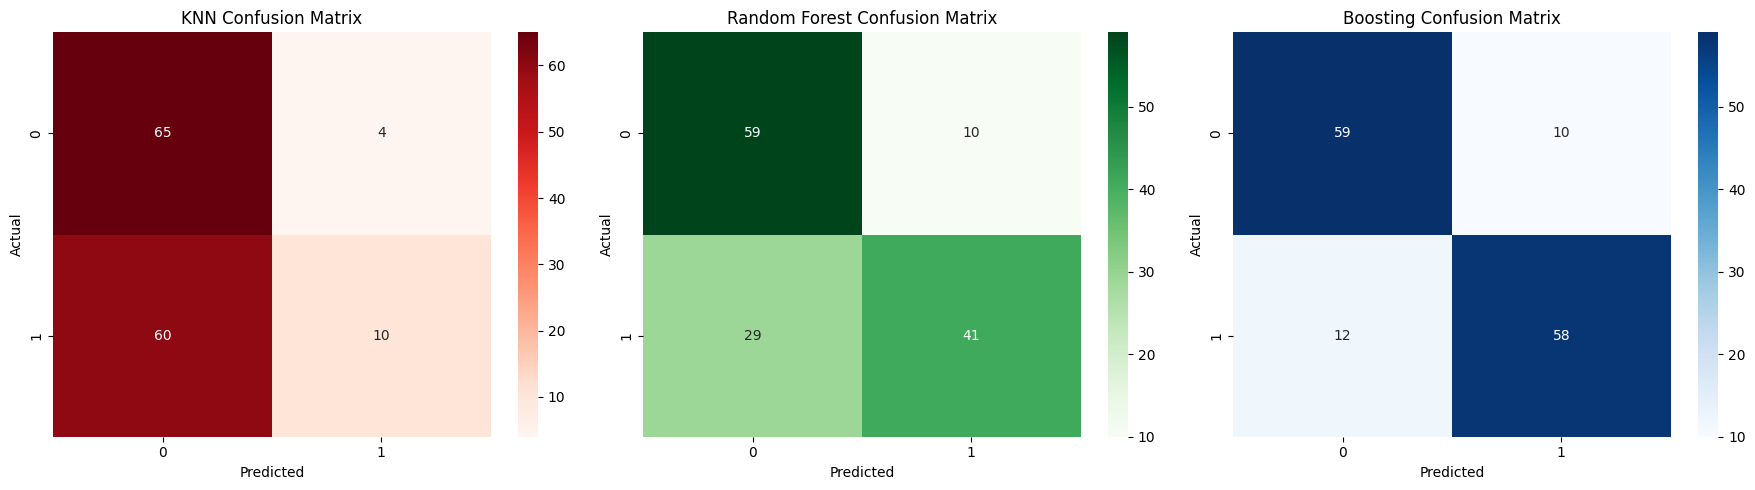

In [38]:
def plot_cm(confusion_matrix, model_name, color):
  fig, axes = plt.subplots(1, 3, figsize=(18, 5))

  for i, (matrix, name, color) in enumerate(zip(confusion_matrix, model_name, color)):
    sns.heatmap(matrix, annot=True, fmt='g', cmap=color, ax=axes[i])
    axes[i].set_title(f'{name} Confusion Matrix')
    axes[i].set_xlabel('Predicted')
    axes[i].set_ylabel('Actual')

  plt.tight_layout()
  plt.show()

cm = [knn_cm, rf_cm, boost_cm]
model_name = ['KNN', 'Random Forest', 'Boosting']
color = ['Reds', 'Greens', 'Blues']
plot_cm(cm, model_name, color)

Hasil plot di atas menunjukkan matriks kebingungan (confusion matrix) dari tiga model klasifikasi yang berbeda: KNN, Random Forest, dan Boosting. Setiap matriks menggambarkan seberapa baik masing-masing model memprediksi kelas data berdasarkan data aktual. Berikut penjelasan dari setiap plot:

1. **KNN Confusion Matrix (Merah)**:
   - Matriks ini menunjukkan bahwa model KNN memprediksi dengan benar sebanyak **65** kasus untuk kelas 0 dan **10** kasus untuk kelas 1.
   - Namun, model ini juga salah memprediksi sebanyak **4** kasus dari kelas 0 menjadi kelas 1 dan **60** kasus dari kelas 1 menjadi kelas 0.
   - Ini menunjukkan bahwa model KNN memiliki performa yang tidak terlalu baik, terutama dalam memprediksi kelas 1, karena banyak prediksi salah pada kelas tersebut.

2. **Random Forest Confusion Matrix (Hijau)**:
   - Matriks ini menunjukkan bahwa model Random Forest memprediksi dengan benar sebanyak **59** kasus untuk kelas 0 dan **41** kasus untuk kelas 1.
   - Kesalahan terjadi pada **10** kasus dari kelas 0 yang diprediksi menjadi kelas 1 dan **29** kasus dari kelas 1 yang diprediksi menjadi kelas 0.
   - Model ini memiliki akurasi yang lebih baik dibandingkan KNN, terutama karena lebih sedikit kesalahan dalam memprediksi kelas 1.

3. **Boosting Confusion Matrix (Biru)**:
   - Pada model Boosting, sebanyak **59** kasus dari kelas 0 dan **58** kasus dari kelas 1 diprediksi dengan benar.
   - Kesalahan terjadi pada **10** kasus dari kelas 0 yang diprediksi menjadi kelas 1 dan **12** kasus dari kelas 1 yang diprediksi menjadi kelas 0.
   - Ini adalah model yang paling akurat di antara ketiga model tersebut, dengan distribusi kesalahan yang lebih sedikit, terutama dalam memprediksi kelas 1.

**Kesimpulan**: Dari ketiga model di atas, **Boosting** memiliki performa terbaik dengan jumlah prediksi benar yang paling tinggi dan jumlah kesalahan yang paling rendah. Model **Random Forest** berada di posisi kedua, sementara **KNN** memiliki performa yang paling rendah, terutama dalam memprediksi kelas 1.